# Übungszettel 12: Neuronale Netze (Musterlösung)

## Maschinelles Lernen - WiSe 23/24

### Abgabe 31.01.2024, 23:55 Uhr

*Hinweise:*
- Übungsaufgaben **müssen** in Gruppen von 3-4 Personen abgegeben werden. **Einzelabgaben werden nicht korrigiert bzw. bewertet.**
- **<span style="color:red;">Es werden auf diesem Übungszettel die letzten zwei Aufgaben bewertet</span>**, die übrigen Aufgaben dienen zur selbstständigen Vertiefung des Vorlesungsstoffs. Für diese Aufgaben werden nach der Abgabe Musterlösungen bereitgestellt.
- Die Lösungen sollen in diesem IPython Notebook realisiert werden, wobei Teilaufgaben und Zwischenergebnisse ausgegeben bzw. visualisiert werden sollen.
- Für die Abgabe sollen Sie dieses IPython Notebook und ggf. zugehörige Dateien in ein **Ziparchiv** packen und im Ilias hochladen. Das Ziparchiv soll nach folgendem Muster benannt werden:
`UebungXX_Nachname1_Nachname2_Nachname3.zip`, wobei die Nachnamen in alphabetischer Reihenfolge angegeben und Umlaute ggf. ersetzt werden sollen. Bei Nichtbefolgung dieser Vorgabe können Punkte abgezogen werden.

---

## Aufgabe 1: Bildklassifizierung mit Deep Learning

In dieser Aufgabe sollen Sie ein einfaches neuronales Netzwerk auf dem Cifar10 Datensatz trainieren.

*Hinweis: Um das Training zu beschleunigen, können Sie einen Rechner mit Grafikkarte (oder Google Colab) verwenden.*

a) Laden Sie den Cifar10 Datensatz über die Keras-Dataset-API (https://keras.io/api/datasets/cifar10/) und machen Sie sich mit dem Datensatz vertraut.

Normalisieren Sie die Pixelwerte der Bilder für das Training zwischen 0 und 1.

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

b) Erstellen Sie ein sequentielles neuronales Netzwerk zur Klassifikation der Bilder auf dem Cifar10 Datensatz unter folgenden Bedingungen:

* Verwenden Sie einen `Flatten`-Layer als Eingabeschicht
* Nutzen Sie danach ausschließlich vollständig verbundene Schichten (`Dense`-Layer)
* Die letzte Schicht soll der Anzahl der Klassen entsprechend aus 10 Neuronen bestehen und die Softmax-Aktivierungsfunktion verwenden
* Die Anzahl der Hidden Layer sowie ihre Größen und Aktivierungsfunktionen dürfen sie selbst wählen

Kompilieren Sie das Modell und geben Sie dabei `'adam'` als Optimierer, `'sparse_categorical_crossentropy'` als Loss-Funktion sowie `'accuracy'` als Metrik an.

Rufen Sie die `summary()`-Funktion des Modells auf, um eine Übersicht über die Schichten des Modells anzuzeigen.

In [2]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Dense(1600, activation='relu'))
model.add(tf.keras.layers.Dense(800, activation='relu'))
model.add(tf.keras.layers.Dense(400, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 1600)              4916800   
_________________________________________________________________
dense_1 (Dense)              (None, 800)               1280800   
_________________________________________________________________
dense_2 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 6,559,110
Trainable params: 6,559,110
Non-trainable params: 0
______________________________________________

c) Führen Sie nun das Training Ihres Modells auf den Cifar10-Trainingsdaten durch. 
* Verwenden Sie den Parameter `validation_split=0.3`, um einen Teil der Trainingsdaten zur automatischen Validierung zu verwenden
* Nutzen Sie den `Tensorboard`-Callback, um den Trainingsfortschritt zu loggen
* Verwenden Sie den `EarlyStopping`-Callback, damit das Training automatisch gestoppt wird, wenn es über mehrere Epochen zu keiner Verbesserung mehr kommt
* Nutzen Sie den `ModelCheckpoint`-Callback mit dem Parameter `save_best_only=True`, um die erlernten Gewichte ihres Modells automatisch zu speichern

*Hinweis: Wenn Sie auf Google Colab arbeiten, sollten Sie Ihr Google Drive mit dem nachfolgenden Befehl mounten und die Dateien dort speichern, da sie sonst beim Beenden des Notebooks verloren gehen.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

*Es wird Ihnen nach der Ausführung ein Link angezeigt, über den Sie ein Token abrufen können. Nachdem Sie dieses hier eingegeben haben, können Sie über den Pfad `'/content/drive/MyDrive/...'` auf die Ordnerstruktur Ihres Google Drives zugreifen.*

In [3]:
import datetime

In [4]:
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(log_dir+'/checkpoints', save_best_only=True)

model.fit(x_train, y_train, epochs=40, validation_split=0.3, callbacks=[tensorboard_callback, early_stopping_callback, checkpoint_callback])

Epoch 1/40
1094/1094 [==============================] - 43s 37ms/step - loss: 2.1431 - accuracy: 0.2107 - val_loss: 1.8165 - val_accuracy: 0.3503
INFO:tensorflow:Assets written to: logs/20210531-115003\checkpoints\assets
Epoch 2/40
1094/1094 [==============================] - 39s 35ms/step - loss: 1.7922 - accuracy: 0.3469 - val_loss: 1.7372 - val_accuracy: 0.3681
INFO:tensorflow:Assets written to: logs/20210531-115003\checkpoints\assets
Epoch 3/40
1094/1094 [==============================] - 39s 35ms/step - loss: 1.6922 - accuracy: 0.3951 - val_loss: 1.6690 - val_accuracy: 0.4024
INFO:tensorflow:Assets written to: logs/20210531-115003\checkpoints\assets
Epoch 4/40
1094/1094 [==============================] - 40s 37ms/step - loss: 1.6240 - accuracy: 0.4148 - val_loss: 1.6575 - val_accuracy: 0.4014
INFO:tensorflow:Assets written to: logs/20210531-115003\checkpoints\assets
Epoch 5/40
1094/1094 [==============================] - 38s 34ms/step - loss: 1.5882 - accuracy: 0.4255 - val_loss: 

d) Rufen Sie das Tensorboard auf, um sich **Loss** und **Accuracy** im Verlauf des Trainings anzuzeigen.
* Im Browser (nur möglich, wenn die Logs auf Ihrem Rechner liegen):
  * Starten von Tensorboard über die Kommandozeile: `tensorboard --logdir=/pfad/zu/logs/`
  * Öffnen von http://localhost:6006/ im Webbrowser
* In Notebook-Zelle (auch in Googe Colab möglich):
  * Laden von Tensorboard-Extension über Line-Magic: `%load_ext tensorboard`
  * Starten von Tensorboard in Notebook-Zelle über Line-Magic: `%tensorboard --logdir /pfad/zu/logs/`
 
Speichern Sie die Plots oder machen Sie Screenshots und zeigen Sie diese hier im Notebook an.

### Loss: (Orange:Train, Blau: Validation)
![epoch_accuracy.svg](epoch_loss.svg)

### Accuracy: (Orange:Train, Blau: Validation)
![epoch_accuracy.svg](epoch_accuracy.svg)

e) Evaluieren Sie Ihr trainiertes Netzwerk auf den Cifar10-Testdaten und geben Sie die erhaltene Accuracy an.

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy: {:.2%}".format(test_acc))

313/313 [==============================] - 3s 8ms/step - loss: 1.4726 - accuracy: 0.4816
Test Accuracy: 48.16%


f) Visualisieren Sie die ersten 3 Bilder aus dem Testdatensatz und geben Sie jeweils die durch Ihr Modell vorausgesagte Klasse mit der dazugehörigen Wahrscheinlichkeit an.

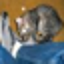

gt:   3
pred: 3 (42.09%))
correct@pos: 0


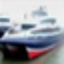

gt:   8
pred: 9 (51.74%))
correct@pos: 1


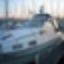

gt:   8
pred: 8 (45.91%))
correct@pos: 0


In [8]:
from PIL import Image
import numpy as np

pred = model.predict(x_test[:3])
for i in range(3):
    image = Image.fromarray((x_test[i]*255).astype('uint8'))
    image = image.resize((image.size[0] * 2, image.size[1] * 2))
    display(image)
    gt = y_test[i][0]
    
    pred_best = pred[i].argmax()
    pred_rank = np.argwhere((-pred[i]).argsort()==gt)[0][0]
    
    print('gt:   {:}'.format(gt))
    print('pred: {:} ({:.2%}))'.format(pred_best, pred[i][pred_best]))
    print('correct@pos: {:}'.format(pred_rank))

---

## Aufgabe 2 - Künstliche neuronale Netze und Gradienten (1+1+1+1+1)

a) Geben Sie die mathematische Definition eines künstlichen Neurons an.

$f \left( \sum_i{w_i x_i+b} \right)$
mit
- $f$: Aktivierungsfunktion
- $x$: Inputs
- $w$: Gewichte
- $b$: Bias

b) Skizzieren Sie den Aufbau eines künstlichen Neurons mit 4 Eingaben.

![Neuron.png](Neuron.png)

c) Welche boolsche Funktion $y$ wird durch das folgende neuronale Netzwerk approximiert? (Für $x_1,x_2\in{0,1}$).

![BoolNet.png](BoolNet.png)

$y = \left( \text{NOT } x_1 \text{ OR } \text{NOT } x_2 \right ) = \text{NOT } \left( x_1 \text{ AND } x_2 \right )$

d) Beschreiben Sie Vor- und Nachteile der Aktivierungsfunktionen Sigmoid sowie Rectified Linear Unit.

* Sigmoid
  * Vorteile: 
    * Werte liegen im Bereich \[0,1\]
  * Nachteile: 
    * Neuronen können saturieren (Gradient dauerhaft 0)
    * Nicht Nullzentriert
    * Rechenaufwändig
* ReLU
  * Vorteile: 
    * Keine Saturierung (im positiven Bereich)
    * Sehr Recheneffizient
    * Schnellere Konvergenz
  * Nachteile:
    * Nicht Nullzentriert
    * Im negativen Bereich ist Gradient 0
    * Dead ReLU (Gradient für alle Trainingsbeispiele 0)

e) Erklären Sie wie Batch Normalization funktioniert und wozu sie eingesetzt wird.

* Funktionsweise:
  * Normalisierung der Aktivierungen mithilfe der Formel $\hat{x}^{(k)} = \frac{x^{(k)} - E[x^{(k)}]}{\sqrt{Var[x^{(k)}]}}$
  * Dann Skalierung und Verschiebung mit trainierbaren Parametern
* Einsatzgebiet:
  * Verwendung meist zwischen Convolutional oder Fully Connected Layer und Aktivierungsfunktion
  * Verbessert den Gradientenfluss
  * Wirkt als Regularisierung
  * Verringert Abhängigkeit des Netzes von Gewichtsinitialisierung

---
## **Aufgabe 3: Dropout Regularisierung (bewertet: 1+2 Punkte)**

Betrachten Sie ein neuronales Netz mit ReLU Aktivierung dessen Gewichte (und damit die Struktur) gegeben ist durch:


$$
W_1=\begin{pmatrix} 1 & 2 \\ -1 & 1 \\ 2 & -1 \end{pmatrix} \hspace{2cm} W_2=\begin{pmatrix} 1 & 2 & -2\\ 2 & -1 & 1 \end{pmatrix} \hspace{2cm} W_3=\begin{pmatrix} 1 & -1 \end{pmatrix} \\
\text{und}\\
b_1=\begin{pmatrix} -1 \\ 1 \\ 2 \end{pmatrix} \hspace{3cm} b_2=\begin{pmatrix} 2 \\ -1 \end{pmatrix} \hspace{4cm} b_3=1
$$

a) Zeichnen Sie die Struktur des Netzwerks.

![Dropout_Network.png](Dropout_Network.png)

b) Berechnen Sie die Ausgaben für die Eingabe $x=\left(\begin{array}{c}1\\ 1\end{array}\right)$ indem die folgenden Dropout-Masken verwendet werden ($\mu_0$ bezieht sich auf die Eingabeschicht, $\mu_1$ auf den Output der ersten Aktivierungsschicht, usw.):

$$\mu_0=\begin{pmatrix} 1 \\ 1 \end{pmatrix} \hspace{3cm} \mu_1=\begin{pmatrix} 1 \\ 0 \\ 1 \end{pmatrix} \hspace{4cm} \mu_2=\begin{pmatrix} 1 \\ 0 \end{pmatrix}$$

$y_1 = relu( W_1 \cdot (x \cdot \mu_0) + b_1 ) = \begin{pmatrix} 2 \\ 1 \\ 3 \end{pmatrix}$,

$y_2 = relu( W_2 \cdot (y_1 \cdot \mu_1) + b_2 ) = relu\begin{pmatrix} -2 \\ 6 \end{pmatrix} = \begin{pmatrix} 0 \\ 6 \end{pmatrix}$,

$y_3 = relu( W_3 \cdot (y_2 \cdot \mu_2) + b_3 ) = 1$
